 <div class="alert alert-block alert-info"><b>Presentado por:</b> <em>Wilmer Ropero Castaño - Jairo Arturo Moran Burgos. Universidad de Antioquía, Maestría en Ingeniería.</em></div>

 <div class="alert alert-block alert-success"><b>Curso:</b> <em>Statistical Learning Data. Universidad de Antioquía, 2020-1. Medellín, Colombia.</em></div>

# Modelos Aditivos Generalizados -GAM- son modelos semiparámetricos suavizados de la forma:

<br>



<div class="math notranslate nohighlight">
\[g(\mathbb{E}[y|X]) = \beta_0 + f_1(X_1) + f_2(X_2, X3) + \ldots + f_M(X_N)\]</div>
<p>Donde <code class="docutils literal notranslate"><span class="pre">X.T</span> <span class="pre">=</span> <span class="pre">[X_1,</span> <span class="pre">X_2,</span> <span class="pre">...,</span> <span class="pre">X_N]</span></code> son las variables independientes, <code class="docutils literal notranslate"><span class="pre">y</span></code> es la variable dependiente, y <code class="docutils literal notranslate"><span class="pre">g()</span></code> es la función de enlace que relaciona nuestras variables predictoras con el valor esperado de la variable dependiente.</p>
<p>La función caracteristica <code class="docutils literal notranslate"><span class="pre">f_i()</span></code> se construyen usando <strong>splines B penalizadas</strong>, que nos pérmiten modelar <strong>automáticamente relaciones no lineales</strong> sin tener que probar manualmente muchas transformaciones diferentes en cada variable.</p>
<p><img alt="Basis splines" src="https://pygam.readthedocs.io/en/latest/_images/pygam_basis.png" width="500" height="80"/></p>
<p>Los GAM amplían los modelos lineales generalizados permitiendo funciones no lineales de las características mientras mantienen la adicionalidad. Dado que el modelo es aditivo, es fácil examinar el efecto de cada  <code class="docutils literal notranslate"><span class="pre">X_i</span></code> en <code class="docutils literal notranslate"><span class="pre">Y</span></code> de forma individual, manteniendo todos los demás predictores constantes.</p>
<p>El resultado es un modelo muy flexible, donde es fácil incorporar conocimientos previos y control de sobrealimentación.</p>
</div>

<br>
<div class="section" id="Generalized-Additive-Models,-in-general">
<h2>GAM,en general:</h2>
<div class="math notranslate nohighlight">
\[y \sim ExponentialFamily(\mu|X)\]</div>
<p>donde</p>
<div class="math notranslate nohighlight">
\[g(\mu|X) = \beta_0 + f_1(X_1) + f_2(X_2, X3) + \ldots + f_M(X_N)\]</div>
<p>Entonces, GAM tien 3 componentes:</p>
<ul class="simple">
<li><code class="docutils literal notranslate"><span class="pre">Una distribución</span></code> de la familia exponencial (normal, binomial, poisson, gamma, inv_gauss)</li>
<li><code class="docutils literal notranslate"><span class="pre">Una función </span> <span class="pre">de enlace</span></code> <span class="math notranslate nohighlight">\(g(\cdot)\)</span></li>
<li><code class="docutils literal notranslate"><span class="pre">forma funcional </span> <span class="pre">con estructura aditiva</span></code> <span class="math notranslate nohighlight">\(\beta_0 + f_1(X_1) + f_2(X_2, X3) + \ldots + f_M(X_N)\)</span></li>
</ul>
    
<div class="section" id="Generalized-Additive-Models,-in-general">
    <h2>Referencias</h2>
</div>
<ul>
<li>Green, P. J., & Silverman, B. W. (1993). Nonparametric regression and generalized linear models: a roughness penalty approach. Chapman and Hall/CRC.</li>
<li>Hastie, T. and Tibshirani, R. (1990). Generalized Additive Models, volume 43. CRC Press, 1990.</li>
<li>Wood, S. N. (2017). Generalized additive models: an introduction with R. Chapman and Hall/CRC.</li>
<li>Hastie, T., and Tibshirani, R. (1987). Generalized additive models: some applications. Journal of the American Statistical Association, 82(398), 371-386.</li>
    <li><a href = "https://cran.r-project.org/package=gam">https://cran.r-project.org/package=gam</a></li>
    <li><a href="https://cran.r-project.org/package=mgcv">https://cran.r-project.org/package=mgcv</a></li>
<li><a href="https://www.statsmodels.org/stable/gam.html">https://www.statsmodels.org/stable/gam.html</a></li>
    <li><a href="https://pygam.readthedocs.io/">https://pygam.readthedocs.io/</a></li>
    <li><a href="https://github.com/dswah/PyData-Berlin-2018-pyGAM/">https://github.com/dswah/PyData-Berlin-2018-pyGAM/</a></li>
</ul>
    
    

# Ejemplos


<div class="alert alert-block alert-warning"><b>Ejemplos:</b> A continuación se pretende presentar dos ejemplos, uno para el tipo <b>regresión</b> y el otro para el tipo <b>clasificación</b>.</div>
    
    
   

## Se importan las librerías necesarías.

In [1]:
#!pip install pygam
import sys
import pygam
import numpy as np
import pandas as pd        
from pygam import LinearGAM, LogisticGAM, l, s, f, te
from pygam import utils as gamutils
from pygam.datasets import wage, mcycle, toy_classification, toy_interaction
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from matplotlib import pyplot as plt



if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

plt.style.use('ggplot')
%matplotlib inline

## Primero veamos el efecto del suavizado (smoothing &#955;)

 <div class="alert alert-block alert-info">Se crea una señal que va creciendo sinusoidalmente.<em> Para efectos del ejemplo</em></div>

Veamos X:
 [0.         0.01002004 0.02004008 0.03006012 0.04008016 0.0501002
 0.06012024 0.07014028 0.08016032 0.09018036] ......lista con longitud 500 valores 

Veamos y:
 [ 2.43237625  0.88216756  0.51535033  0.07113229  0.6701722   0.22356174
 -0.8965204   2.14629376 -0.26924208  0.91465621] ......lista con longitud 500 valores


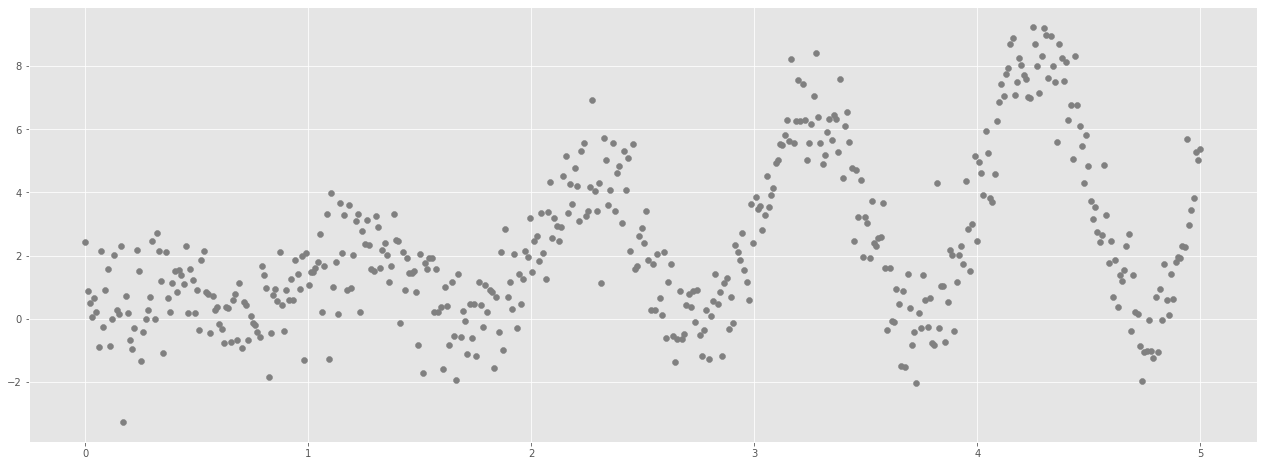

In [2]:
x = np.linspace(0, 5, 500) #Generamos un vector X (numpy.linspace(start, stop, num=500))
print("Veamos X:\n",x[:10], f'......lista con longitud {len(x)} valores \n')

y = np.sin(x * 2 * np.pi)*x + x + np.random.randn(len(x)) #Generamos una función sinosoidal 
print("Veamos y:\n", y[:10], f'......lista con longitud {len(y)} valores')

plt.rcParams['figure.figsize'] = (22, 8)
plt.scatter(x,y,color='gray')

## &#955; alto.

<div class="alert alert-block alert-warning"><b>Fuerza del suavizado &#955; alta :</b> A continuación se selecciona un suavizado o penalización de 1+e6. Note que se ha pérdido la flexibilidad del modelo, se ha generado una línea recta.</div>

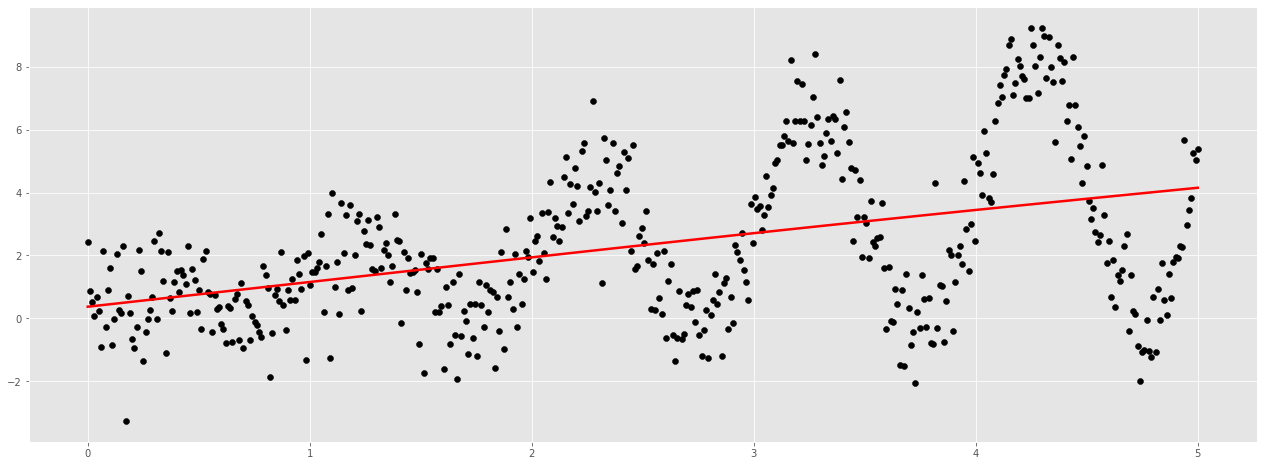

In [3]:
"""Ejecutamos un módelo lineal de GAM"""
gam = LinearGAM(lam=1e6, n_splines=50).fit(x, y)

"""Generamos el gráfico de dispersión."""
XX = gam.generate_X_grid(term=0)
plt.rcParams['figure.figsize'] = (22, 8)
plt.plot(XX, gam.predict(XX), 'red', linewidth=2.5)
plt.scatter(x, y, color='black')



In [4]:

gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      2.1141
Link Function:                     IdentityLink Log Likelihood:                                 -1334.8389
Number of Samples:                          500 AIC:                                             2675.9059
                                                AICc:                                            2675.9576
                                                GCV:                                                5.2767
                                                Scale:                                              5.2365
                                                Pseudo R-Squared:                                   0.1897
Feature Function                  Lam

## &#955; bajo.

<div class="alert alert-block alert-warning"><b>Fuerza del suavizado &#955; baja :</b> A continuación se selecciona un suavizado o penalización de 1-e6. Note que ahora el módelo es muy flexible.</div>

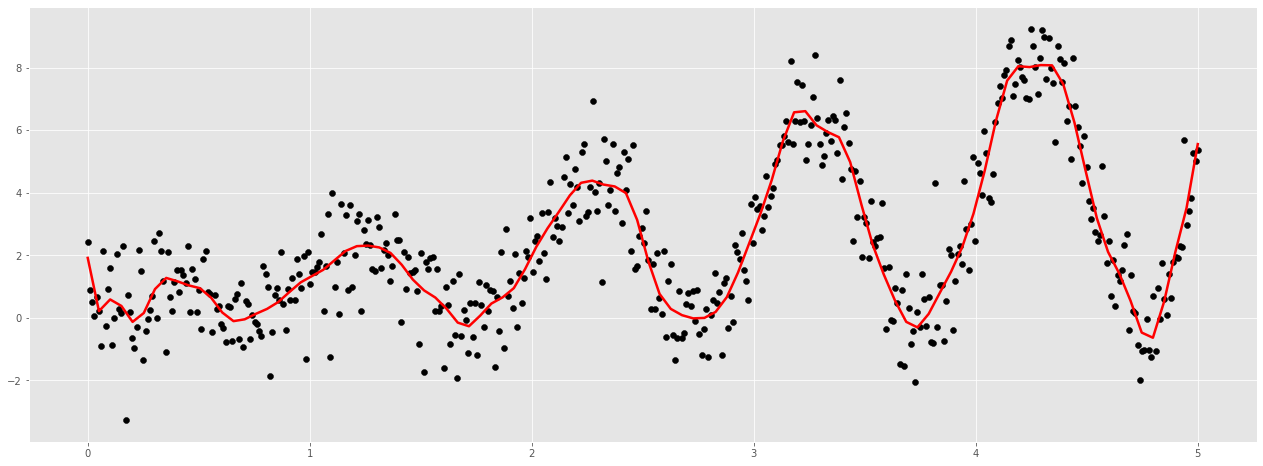

In [5]:
gam = LinearGAM(lam=1e-6, n_splines=50).fit(x, y)

XX = gam.generate_X_grid(term=0)
plt.rcParams['figure.figsize'] = (22, 8)
plt.plot(XX, gam.predict(XX), 'r', linewidth=2.5)
plt.scatter(x, y, color='black')

In [6]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     49.9993
Link Function:                     IdentityLink Log Likelihood:                                  -701.3144
Number of Samples:                          500 AIC:                                             1504.6275
                                                AICc:                                            1516.4665
                                                GCV:                                                1.2919
                                                Scale:                                              1.0616
                                                Pseudo R-Squared:                                   0.8515
Feature Function                  Lam

## &#955; Óptimo.

 <div class="alert alert-block alert-success"><b>Suavizado óptimo:</b> Para seleccionar el valor correcto de suavizado , se utiliza <b><em>gridsearch, para que el módelo elija en un espacio de busqueda!</em></b>.</div>

100% (100 of 100) |######################| Elapsed Time: 0:00:01 Time:  0:00:01


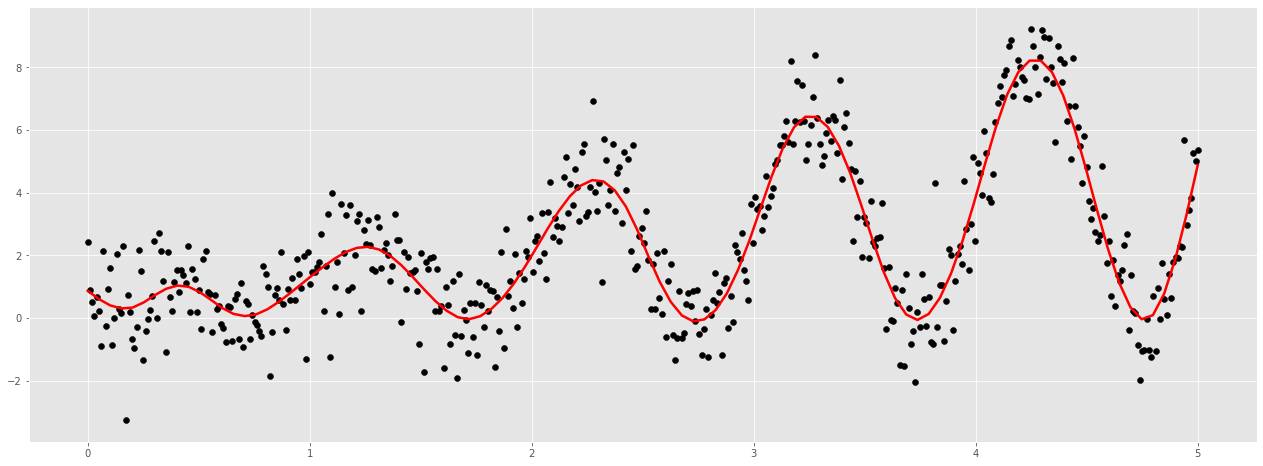

In [7]:
"""Se crea un espacio de busqueda para que el módelo escoja el mejor valor """
lams = np.logspace(-4, 100, 100)
gam = LinearGAM(n_splines=50).gridsearch(x[:,None], y, lam=lams)


XX = gam.generate_X_grid(term=0)
plt.rcParams['figure.figsize'] = (22, 8)
plt.plot(XX, gam.predict(XX), 'r', linewidth=2.5)
plt.scatter(x, y, color='black')

In [8]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     24.0221
Link Function:                     IdentityLink Log Likelihood:                                  -711.1371
Number of Samples:                          500 AIC:                                             1472.3185
                                                AICc:                                             1475.066
                                                GCV:                                                1.1515
                                                Scale:                                              1.0524
                                                Pseudo R-Squared:                                   0.8443
Feature Function                  Lam

# Regresión (GAMs)

##### Se utiliza la función para regresiones líneales de pyGAM.

$$\mathbb{E}[y|X]=\beta_0+f_1(X_1)+f_2(X_2,X_3)+ \dots +f_M(X_N) \\
\vdots \\
\mathbb{E}[y|X]=\beta_0+f_1(X_1)+f_2(X_2)+ \dots +f_M(X_N)
$$

 <div class="alert alert-block alert-info">Este conjunto de datos trata de variantes rojas del vino portugués <em>"Vinho Verde"</em>, disponibles en el repositorio de <em>"Machine Learning"</em> UCI. Las características de entrada son 11 variables fisicoquímicas que describen las variantes de vino tinto desde varios aspectos. </em></div>

<div class="alert alert-block alert-warning"><b>Variable objetivo:</b> El objetivo es la <b><em>puntuación de calidad</em></b>, que va de 0 a 10, que indica lo bueno que es el vino tinto.</div>

### Preparando los datos

In [9]:
redwine_url = 'https://raw.githubusercontent.com/ianshan0915/medium-articles/master/data/redwine-quality.csv'
redwine = pd.read_csv(redwine_url)
print("Cantidad de datos: ",len(redwine),"observaciones")

Cantidad de datos:  1599 observaciones


In [10]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
redwine_X = redwine.drop(['quality'], axis=1).values # Saco la variable objetivo del DataSet.
redwine_y = redwine['quality'] # Variable objetivo. Calidad del vino.

### Usamos la función <em>gridsearch()</em> para el suavizado

In [12]:
lams = np.logspace(-4, 100, 100)
gam = LinearGAM().gridsearch(redwine_X, redwine_y, lam=lams)

100% (100 of 100) |######################| Elapsed Time: 0:00:14 Time:  0:00:14


<Figure size 1584x576 with 0 Axes>

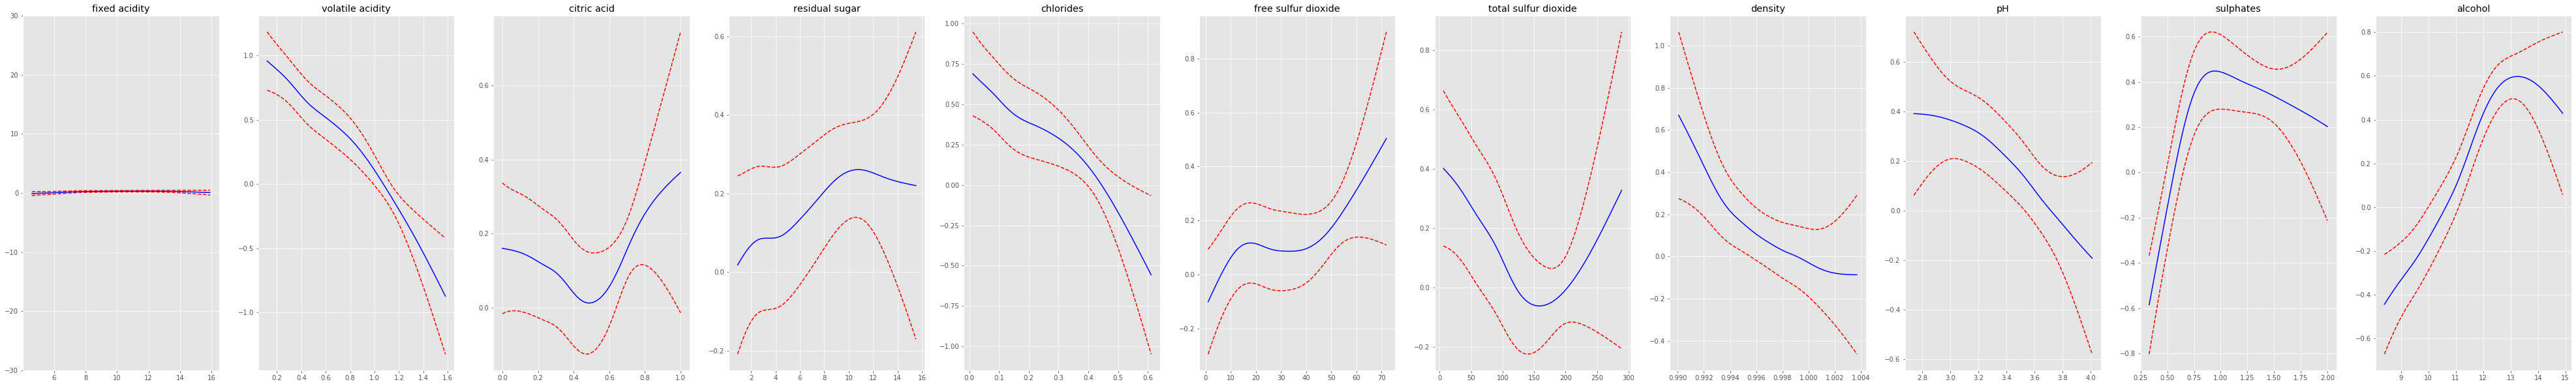

In [13]:
titles = redwine.columns[0:11]
plt.figure()
fig, axs = plt.subplots(1,11,figsize=(70, 10))

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX),c='b')
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])



In [14]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     37.8186
Link Function:                     IdentityLink Log Likelihood:                                 -1961.9269
Number of Samples:                         1599 AIC:                                              4001.491
                                                AICc:                                            4003.4737
                                                GCV:                                                0.4108
                                                Scale:                                              0.3933
                                                Pseudo R-Squared:                                   0.4108
Feature Function                  Lam

<div class="alert alert-block alert-warning"><b>Prueba del módelo:</b> Separamos para hacer el test y para entrenar...el tamaño seleccionado para realizar el test es el 20% de las variables. </div>

In [15]:
X_train, X_test, y_train, y_test = train_test_split(redwine_X, redwine_y, test_size=0.2, random_state=42)

lams = np.logspace(-4, 100, 100)
gam = LinearGAM(n_splines=20).gridsearch(X_train, y_train,lam=lams)
gam.summary()

100% (100 of 100) |######################| Elapsed Time: 0:00:15 Time:  0:00:15


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     35.8631
Link Function:                     IdentityLink Log Likelihood:                                 -1558.3933
Number of Samples:                         1279 AIC:                                             3190.5129
                                                AICc:                                             3192.762
                                                GCV:                                                0.4196
                                                Scale:                                              0.3984
                                                Pseudo R-Squared:                                   0.4047
Feature Function                  Lam

<div class="alert alert-block alert-warning"><b>Realizando el test:</b> Si bien anteriormente se selecciono el 20% de las variables, para efectos del ejemplo y para poder visualizar mejor la gráfica, se realiza la predicción de 100 datos de la variable X_test. </div>

Text(0.5, 1.0, 'Intervalo de confianza del 95.00 %')

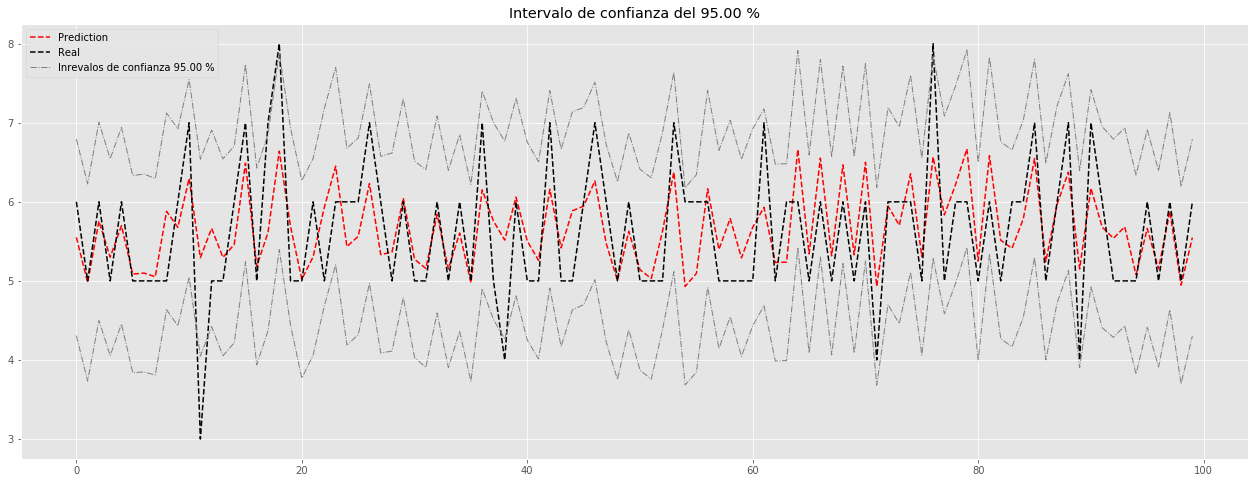

In [16]:
"""Tomo 100 valores para predecir"""
predictions = gam.predict(X_test[:100])
xsa = range(len(predictions))

IC=0.95 # Intervalo de confianza

plt.plot(xsa, predictions, '--r', xsa, y_test[:100], '--k', lw = 1.5)
plt.plot(xsa, gam.prediction_intervals(X_test[0:100], width=IC), color='gray', ls='-.', lw=1)
plt.legend(('Prediction', 'Real', f'Inrevalos de confianza {IC*100:.2f} %'))
plt.title(f"Intervalo de confianza del {IC*100:.2f} %")

<div class="alert alert-block alert-warning"><b>Preparando resultados:</b> Preparo la información para mostrar  la predicción en un DataFrame. Se adiciona la columna del error. </div>

In [17]:
y_test        = pd.DataFrame(y_test).reset_index(drop=True)
y_predictions = pd.DataFrame(predictions).reset_index(drop=True)

table_predict = pd.concat([y_test ,y_predictions],axis=1)
table_predict.columns = ['Calidad_real','Calidad_predecida']

#REdondeo la calidad predecida
for i in range(len(table_predict)):
    table_predict.loc[:,'Calidad_predecida'] = round(table_predict.loc[:,'Calidad_predecida'] ,1)

#Cálculo el error
table_predict['error %']=abs(round(((table_predict['Calidad_real'] - 
                                   table_predict['Calidad_predecida'])/
                                  table_predict['Calidad_real'])*100,1))

print("Error máximo", max(table_predict.loc[:99,'error %']),"%")
print("Error Promedio", round(sum(table_predict.loc[:99,'error %'].values.tolist())/100,1),"%")



Error máximo 76.7 %
Error Promedio 9.2 %


 <div class="alert alert-block alert-success"><b>Resultado de la predicción:</b> A continuación se presenta el resultado para 12 variables, en la mayoria de los casos se logra una buena aproximación, con un <em><b>error promedio de 8.9% </b></em>, sin embargo, <em><b>tenemos casos con errores de predicción altos!</em></b>.</div>

In [18]:
table_predict.loc[:11,]

,Calidad_real,Calidad_predecida,error %
0,6,5.6,6.7
1,5,5.0,0.0
2,6,5.8,3.3
3,5,5.3,6.0
4,6,5.7,5.0
5,5,5.1,2.0
6,5,5.1,2.0
7,5,5.1,2.0
8,5,5.9,18.0
9,6,5.7,5.0
